In [13]:
%matplotlib inline

In [15]:
import pandas as pd
import numpy as np


N = 1000


u = np.random.normal(size=N)
x = np.random.binomial(1., p=1./(1. + np.exp(-u)))

y0_t0 = np.random.normal(1. + u)
y1_t0 = np.random.normal(1. + u + 3)

y0_t1 = np.random.normal(2. + u)
y1_t1 = np.random.normal(2. + u + 3.)

y_t0 = y0_t0
y_t1 = x*y1_t1 + (1-x)*y0_t1

data = []
for i, (xi, y_t0i, y_t1i, y0_t0i, y1_t0i, y0_t1i, y1_t1i) in enumerate(zip(x, y_t0, y_t1, y0_t0, y1_t0, y0_t1, y1_t1)):
    data.append({'x': xi, 'y': y_t0i, 't': 0, 'unit': i, 'y0': y0_t0i, 'y1': y1_t0i})
    data.append({'x': xi, 'y': y_t1i, 't': 1, 'unit': i, 'y0': y0_t1i, 'y1': y1_t1i})
    
df = pd.DataFrame(data)

In [16]:
df

,x,y,t,unit,y0,y1
0,1,1.115843,0,0,1.115843,5.873199
1,1,7.862414,1,0,1.566437,7.862414
2,0,2.724581,0,1,2.724581,6.381854
3,0,4.626480,1,1,4.626480,6.915197
4,0,-0.829542,0,2,-0.829542,0.747194
...,...,...,...,...,...,...
1995,1,4.199510,1,997,3.214508,4.199510
1996,1,0.708317,0,998,0.708317,4.475364
1997,1,4.965425,1,998,2.072806,4.965425
1998,0,-1.114895,0,999,-1.114895,3.167037


In [17]:
df[df.t == 1].groupby('x').mean()['y'][1] - df[df.t==1].groupby('x').mean()['y'][0]

3.8241748764950123

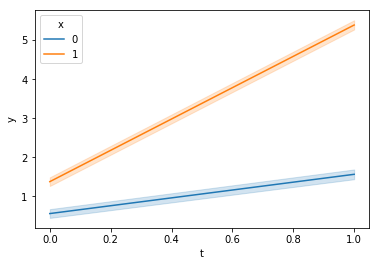

In [18]:
import seaborn as sns

sns.lineplot(data=df, x='t', y='y', hue='x')

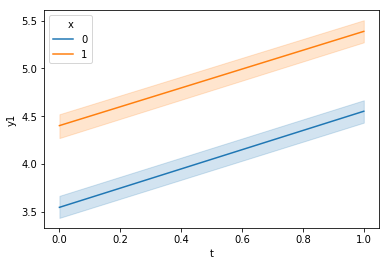

In [20]:
sns.lineplot(data=df, x='t', y='y1', hue='x')

In [21]:
from statsmodels.api import OLS

df['intercept'] = 1.
df['tx'] = df['t'] * df['x']

model = OLS(endog=df['y'], exog=df[['intercept', 't', 'x', 'tx']])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     1298.
Date:                Tue, 30 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:12:00   Log-Likelihood:                -3431.2
No. Observations:                2000   AIC:                             6870.
Df Residuals:                    1996   BIC:                             6893.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5571      0.061      9.138      0.000       0.438       0.677
t              1.0057      0.086     11.665      0.000       0.837       1.175
x              0.8175      0.085      9.595      0.000       0.650       0.985
tx             3.0067      0.120     24.954      0.000       2.770       3.243
==============================================================================
Omnibus:                        0.418   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.811   Jarque-Bera (JB):                0.465
Skew:                          -0.031   Prob(JB):                        0.793
Kurtosis:                       2.959   Cond. No.                         6.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""